In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib  


In [2]:
file_path = "C:/Users/Admin/OneDrive - K L University/Desktop/GROWTHLINLK TASK/titanic-passengers.csv"
df = pd.read_csv(file_path, sep=';')

print(df.head())


   PassengerId Survived  Pclass                                         Name  \
0          343       No       2                   Collander, Mr. Erik Gustaf   
1           76       No       3                      Moen, Mr. Sigurd Hansen   
2          641       No       3                       Jensen, Mr. Hans Peder   
3          568       No       3  Palsson, Mrs. Nils (Alma Cornelia Berglund)   
4          672       No       1                       Davidson, Mr. Thornton   

      Sex   Age  SibSp  Parch      Ticket     Fare  Cabin Embarked  
0    male  28.0      0      0      248740  13.0000    NaN        S  
1    male  25.0      0      0      348123   7.6500  F G73        S  
2    male  20.0      0      0      350050   7.8542    NaN        S  
3  female  29.0      0      4      349909  21.0750    NaN        S  
4    male  31.0      1      0  F.C. 12750  52.0000    B71        S  


In [3]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True, errors='ignore')


In [4]:
df['Age'].fillna(df['Age'].median(), inplace=True)  
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)  
df['Fare'].fillna(df['Fare'].median(), inplace=True)  


In [5]:
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])  
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])  
df['Survived'] = df['Survived'].map({'Yes': 1, 'No': 0})  # Convert 'Yes' -> 1, 'No' -> 0


In [6]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # Include self


In [7]:
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize']
target = 'Survived'
X = df[features]
y = df[target]


In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [10]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [11]:
best_model = grid_search.best_estimator_


In [12]:
y_pred = best_model.predict(X_test)


In [13]:
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Performance:")
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Model Performance:
Accuracy: 0.8212

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86       114
           1       0.78      0.71      0.74        65

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179



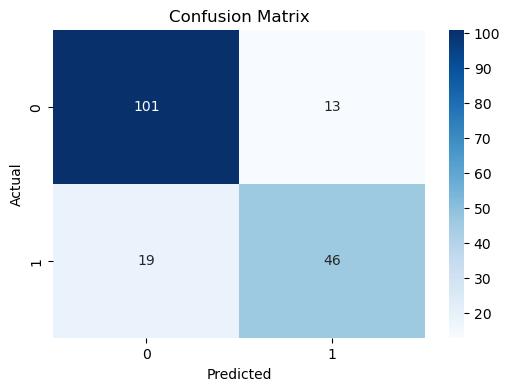

In [14]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [15]:
joblib.dump(best_model, "titanic_survival_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [16]:
print("\nOptimized Model and Scaler saved successfully!")



Optimized Model and Scaler saved successfully!
